In [44]:
# import the necessary modules
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

# Problem 1

First let's set up all the parameters we will need for each of the simulations, regardless of the approach.

In [45]:
# parameters for our ODE
N_0 = 1
k = 0.03 # min^-1

# parameters for our integration
dt = 20 # min
total_time = 120 # min

# determine the number of steps that will be taken
num_steps = int(total_time/dt)

Below we do the approximation using the Euler method.

In [50]:
# initilize an array of length num_steps into which to store values of N
N = np.zeros(num_steps)
N[0] = N_0

# numerically integrate by looping through N
for t in range(0,num_steps-1):
    
    # first calculate dN, using pevious N entry
    dN = N[t]*k*dt
    
    # update current N entry
    N[t+1] = N[t] + dN
    
# save array for plotting later
euler = N.copy()

Now we do the "improved" Euler.

In [51]:
# reset the N array for the population
N = np.zeros(num_steps)
N[0] = N_0

# numerically integrate by looping through N
for t in range(0,num_steps-1):
    
    # first calculate dN, using pevious N_t entry
    dN = N[t]*k*dt
    
    # initial guess at N, using normal Euler's
    N_guess = N[t] + dN
    
    # final approximation for the new value of N
    N_new = N[t] + 0.5*(N[t]+N_guess)*k*dt
    
    # update the N array
    N[t+1] = N_new
    
# save array for plotting later
improved_euler = N.copy()

Lastly, we have the Runge-Kutta approximation.

In [52]:
# reset the N array for the population
N = np.zeros(num_steps)
N[0] = N_0

# numerically integrate by looping through N
for t in range(0,num_steps-1):
    
    # first calculate dN, using pevious N_t entry
    k1 = N[t]*k*dt
    
    # calulcate the other intermediated values
    k2 = (N[t]+0.5*k1)*k*dt
    k3 = (N[t]+0.5*k2)*k*dt
    k4 = (N[t]+k3)*k*dt
    
    # final approximation for the new value of N
    N_new = N[t] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
    
    # update the N array
    N[t+1] = N_new
    
# save array for plotting later
runge_kutta = N.copy()

Now we can plot all of them below to see how they compare.

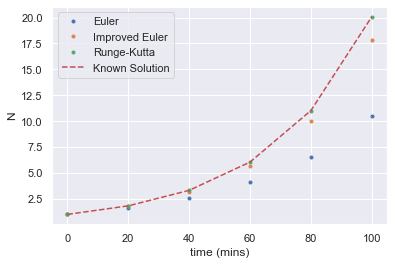

In [56]:
# compute the known solution
times = np.arange(num_steps)*dt
soln = N_0 * np.exp(k*times)

# plot both our integration and the known solution
plt.plot(times, euler, '.')
plt.plot(times, improved_euler, '.')
plt.plot(times, runge_kutta, '.')
plt.plot(times, soln, '--')

plt.xlabel("time (mins)")
plt.ylabel("N")
plt.legend(["Euler", "Improved Euler", "Runge-Kutta", "Known Solution"])

# Problem 2

In [7]:
# parameters for our ODE
N_0 = 2
r = 0.5
K = 1000

# parameters for our integration
dt = 0.05 
total_time = 25 

# determine the number of steps that will be taken
num_steps = int(total_time/dt)

In [8]:
# initilize an array of length num_steps into which to store values of N
N = np.zeros(num_steps)
N[0] = N_0

# numerically integrate by looping through N
for t in range(0,num_steps-1):
    
    # first calculate dN, using pevious N entry
    dN = r*N[t]*(1-N[t]/K)*dt
    
    # update current N entry
    N[t+1] = N[t] + dN

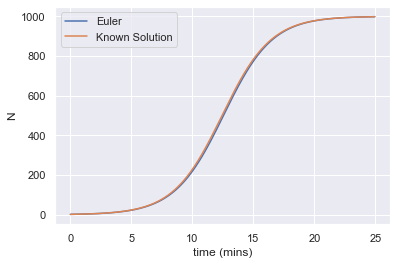

In [9]:
# compute the known solution
times = np.arange(num_steps)*dt
soln_top = K*N_0*np.exp(r*times)
soln_bottom = K - N_0*(1-np.exp(r*times))
soln = soln_top / soln_bottom

plt.plot(times, N)
plt.plot(times, soln)


plt.xlabel("time (mins)")
plt.ylabel("N")
plt.legend(["Euler", "Known Solution"])

In [10]:
def log_growth(N_0):
    
    # initilize an array of length num_steps into which to store values of N
    N = np.zeros(num_steps)
    N[0] = N_0

    # numerically integrate by looping through N
    for t in range(0,num_steps-1):

        # first calculate dN, using pevious N entry
        dN = r*N[t]*(1-N[t]/K)*dt

        # update current N entry
        N[t+1] = N[t] + dN
        
    return N

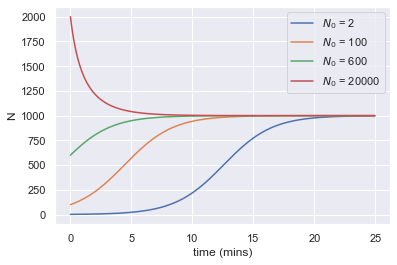

In [11]:
for N_0 in [2, 100, 600, 2000]:

    N = log_growth(N_0)
    
    plt.plot(times, N)
    
plt.xlabel("time (mins)")
plt.ylabel("N")
plt.legend(["$N_0$ = 2", "$N_0$ = 100", "$N_0$ = 600", "$N_0$ = 20000"])

# Problem 3

## (a) $\dot x = x(1-x)(2-x)$

The fixed points are at $x=0$, $x=1$, $x=2$

To establish their stability, let's first make it easier to take the second derivative. 

\begin{align}
\dot x &= x(1-x)(2-x) \\ 
&= (x-x^2)(2-x) \\
&= 2x - x^2 - 2x^2 + x^3 \\
&= x^3 -3x^2 + 2x
\end{align}

We can now find the second derivative as:

\begin{align}
\ddot x = 3x^2 - 6x + 2 
\end{align}


Stability analysis:

- When $x=0$: $\ddot x = 2$, meaning the fixed point is **unstable**.

- When $x=1$: $\ddot x = -1$, meaning the fixed point is **stable**.

- When $x=2$: $\ddot x = 2$, meaning the fixed point is **unstable**.


## (b) $\dot x = 1 - e^{-x^2}$

Let's set $\dot x = 0$ to find the fixed points:

\begin{align}
0 &= 1 - e^{-x^2} \\
e^{-x^2} &= 1 \\
-x^2 &= ln(1) \\
-x^2 &= 0 \\
x &= 0.
\end{align}

Using the chain rule, we can evaluate the second derivative as:

\begin{align}
\ddot x = 2xe^{-x^2}
\end{align}

This second derivative evaluated at the fixed point $x=0$ yields $\ddot x = 0$, meaning that we can't say anything about the stability of this fixed point. So let's plot $\dot x$ vs. $x$ to see if we can get any graphical intuition.

Text(0, 0.5, '$\\dot x$')

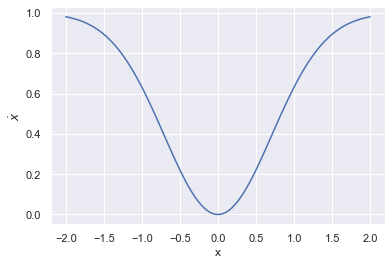

In [12]:
x = np.linspace(-2,2,100)
x_dot = 1-np.exp(-x**2)

plt.plot(x, x_dot)
plt.xlabel('x')
plt.ylabel('$\dot x$')

We can now see that this fixed point would be **half-stable**. As the flow of $\dot x$ will be towards the positive direction for all value of $x$, this will be *towards* the fixed point for $x<0$ and *away from* the fixed point at $x>0$.

## (c) $\dot x = ax- x^3$

### When $a$ is positive

We see that $\dot x = 0$ when $x=0$, making this one fixed point. The other fixed points can be found by:

\begin{align}
0 &= ax - x^3 \\
x^3 &= ax \\
x^2 &= a.
\end{align}

We pause to note that if $a$ is negative, there is no way for $x^2 = a$ to be satisfied, so we only have the $x=0$ fixed point in that scenario. Otherwise, we have fixed points as $x = \pm \sqrt{a}$ as well.

To evaluate the three fixed points, let's look at the second derivative:

\begin{align}
\ddot x = a - 3x^2
\end{align}

Stability analysis: 

- When $x=0$, $\ddot x = a$, meaning the fixed point is **unstable** in this case of positive $a$
- When $x = \sqrt{a}$, $\ddot x = -2a$, meaning the fixed point is **stable**
- When $x = -\sqrt{a}$, $\ddot x = -2a$, meaning the fixed point is **stable**


### When $a=0$

When $a=0$, $\dot x = -x^3$, which will only have a fixed point at $x=0$.

The second derivative will be $\ddot x = -3x^2$, which evaluates to 0, when $x=0$. This means we must plot the result to interpret the stability. 

Text(0, 0.5, '$\\dot x$')

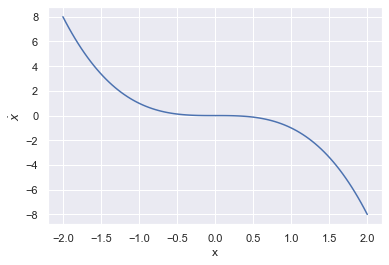

In [13]:
a = 0
x = np.linspace(-2,2,100)
x_dot = a*x - x**3

plt.plot(x, x_dot)
plt.xlabel('x')
plt.ylabel('$\dot x$')

We see that even though the second derivative evaluates to 0 when $x=0$, the overall behavior through the fixed point has a negative slope, making it a **stable** fixed point.

### When $a$ is negative

As we established above, there is also only the fixed point at $x=0$ when $a$ is negative. 

When we evaluate the second derivative at $x=0$, we are left with $\ddot x = a$, which will be a **stable** fixed point, as $a$ is negative. 

# Problem 4

## (a) 

Since the differential equation is defined as $\dot x = x(1-x)$, there is inherently no impact of time on the expected slope at each given $x$. Said another way, it does not matter how or when we arrived at the current value of $x$, the corresponding value of $\dot x$ will always be the same. This means the slope across time will always be the same. 

## (b) 

### $\dot x = x(1-x)(2-x)$

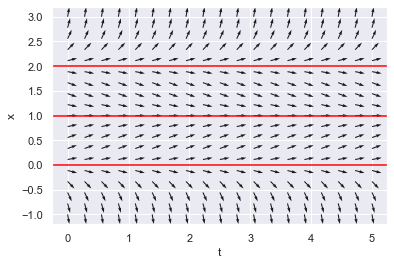

In [14]:
# specify range of t and x values to plot over
# last number is the number of arrows that will be plotted per side
t = np.linspace(0,5,19)
x = np.linspace(-1,3,19)

# set up 'grid' of (t,x) values for plot
T, X = np.meshgrid(t, x)

# define the x_dot function
def x_dot(t,x):
    return x*(1-x)*(2-x)

# compute x_dot for our grid of (t,x) values
dXdT = x_dot(T,X)

# nomalize the lengths of the arrows, for cleaner plotting
U = (1 / (1 + dXdT**2)**.5)*np.ones(T.shape)
V = (1 / (1 + dXdT**2)**.5)*dXdT

# plot the U, V arrows on the T, X grid
plt.quiver(T, X, U, V)
plt.xlabel('t')
plt.ylabel('x')

plt.axhline(y=0, color="red")
plt.axhline(y=1, color="red")
plt.axhline(y=2, color="red")

From the slope field, we can see the $x=1$ is a stable fixed point, with the arrows flowing towards it. Conversely, $x=0$ and $x=2$ are unstable fixed points, with arrows flowing away from these values. 

### $\dot x = 1 - e^{-x^2}$

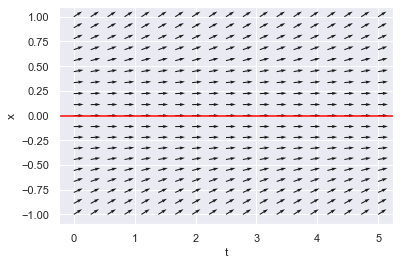

In [15]:
# specify range of t and x values to plot over
# last number is the number of arrows that will be plotted per side
t = np.linspace(0,5,19)
x = np.linspace(-1,1,19)

# set up 'grid' of (t,x) values for plot
T, X = np.meshgrid(t, x)

# define the x_dot function
def x_dot(t,x):
    return 1 - np.exp(-x**2)

# compute x_dot for our grid of (t,x) values
dXdT = x_dot(T,X)

# nomalize the lengths of the arrows, for cleaner plotting
U = (1 / (1 + dXdT**2)**.5)*np.ones(T.shape)
V = (1 / (1 + dXdT**2)**.5)*dXdT

# plot the U, V arrows on the T, X grid
plt.quiver(T, X, U, V)
plt.xlabel('t')
plt.ylabel('x')

plt.axhline(y=0, color="red")

From the slope field, we can see the half-stable nature of the fixed point at $x=0$, where values below 0 flow inward, but values above 0 flow away. 